In [ ]:
from google.colab import files

files.upload()  # Загрузите файл kaggle.json (наш API - токен)

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"spawn03","key":"179f2be51ff53214cb68acfb2caedbfa"}'}

In [ ]:
# Настройка API - токена
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
# Устанавливаем права доступа на файл
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# Загрузка датасета Credit Card Fraud Detection
!kaggle datasets download -d mlg-ulb/creditcardfraud

Dataset URL: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
License(s): DbCL-1.0
  0% 0.00/66.0M [00:00<?, ?B/s]
100% 66.0M/66.0M [00:00<00:00, 1.65GB/s]


In [ ]:
# Распаковка и использование датасета
!unzip creditcardfraud.zip

Archive:  creditcardfraud.zip
  inflating: creditcard.csv          


In [ ]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install scikit-learn
!pip install seaborn

теперь датасет распакован и его можно использовать

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Загружаем наш датасет из директории google colab с помощью библиотеки pandas
df = pd.read_csv('creditcard.csv')

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.columns.shape[0]

31

In [ ]:
# Изучим баланс классов
df['Class'].value_counts()

,count
Class,
0,284315
1,492


0 - нормальная транзакция

1 - мошенническая транзакция

высчитаем процентое соотношение аномальных данных к нормальным:

In [ ]:
# высчитаем процентое соотношение аномальных данных к нормальным:
percent = (492 * 100)/(284315 + 492)
print(f'Процент аномалий = {round(percent,1)}% или {round(percent/100,3)}')

Процент аномалий = 0.2% или 0.002


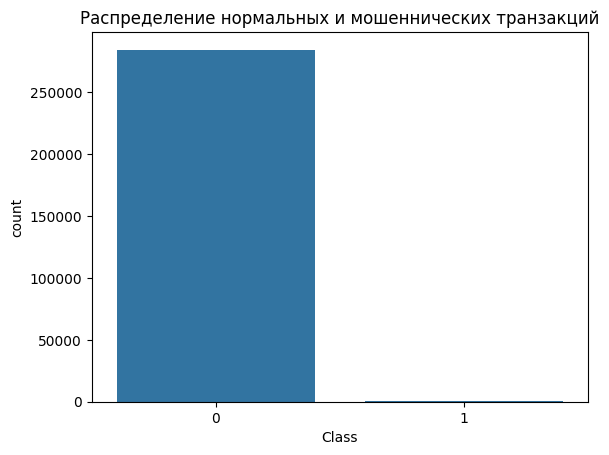

In [ ]:
# Визуализируем распределение классов
sns.countplot(x='Class', data=df)
plt.title('Распределение нормальных и мошеннических транзакций')
plt.show()

- модуль train_test_split нужен для разбиение данных на обучающие и тестовые

- модуль StandardScaler нужен для стандартизации данных (чтобы они были в нужном виде)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
# Отделяем целевую переменную Class от остальных признаков, где y - целевая переменная
X = df.drop(['Class'], axis=1)
y = df['Class']

In [ ]:
# Стандартизируем признак 'Amount'
scaler = StandardScaler()
X['Amount'] = scaler.fit_transform(X['Amount'].values.reshape(-1, 1))

In [ ]:
# Разделяем нашу выборку на обучающую и тестовую
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,
                                                    random_state = 42)

In [ ]:
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

так как процент аномальных данных составил 0,2% или 0.002 => contamination=0.002

In [ ]:
# Обучаем Isolation Forest
model = IsolationForest(n_estimators=100, contamination=0.002, random_state=42)
model.fit(X_train)

IsolationForest(contamination=0.002, random_state=42)

In [ ]:
# предсказания Isolation Forest на тестовой выборке
y_pred = model.predict(X_test)

In [ ]:
y_pred

array([1, 1, 1, ..., 1, 1, 1])

В модели Isolation Forest аномалии отмечаются как -1, нормальные точки как 1

Поэтому проебразуем предсказания в формат классов 0 и 1

In [ ]:
y_pred = [1 if i == -1 else 0 for i in y_pred]

In [ ]:
len(y_pred), len(X_test)

(93987, 93987)

In [ ]:
X_test

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
43428,41505.0,-16.526507,8.584972,-18.649853,9.505594,-13.793819,-2.832404,-16.701694,7.517344,-8.507059,...,-1.514923,1.190739,-1.127670,-2.358579,0.673461,-1.413700,-0.462762,-2.018575,-1.042804,1.102834
49906,44261.0,0.339812,-2.743745,-0.134070,-1.385729,-1.451413,1.015887,-0.524379,0.224060,0.899746,...,0.506044,-0.213436,-0.942525,-0.526819,-1.156992,0.311211,-0.746647,0.040996,0.102038,1.726255
29474,35484.0,1.399590,-0.590701,0.168619,-1.029950,-0.539806,0.040444,-0.712567,0.002299,-0.971747,...,0.212877,0.102398,0.168269,-0.166639,-0.810250,0.505083,-0.232340,0.011409,0.004634,-0.229289
276481,167123.0,-0.432071,1.647895,-1.669361,-0.349504,0.785785,-0.630647,0.276990,0.586025,-0.484715,...,-0.244633,0.358932,0.873663,-0.178642,-0.017171,-0.207392,-0.157756,-0.237386,0.001934,-0.347232
278846,168473.0,2.014160,-0.137394,-1.015839,0.327269,-0.182179,-0.956571,0.043241,-0.160746,0.363241,...,-0.255293,-0.238644,-0.616400,0.347045,0.061561,-0.360196,0.174730,-0.078043,-0.070571,-0.349671
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211399,138395.0,1.914230,0.067770,-2.083358,0.055530,1.485432,1.190085,-0.018685,0.297667,0.295323,...,-0.161112,-0.225442,-0.402688,0.277025,-1.054116,-0.212473,-0.506178,0.050672,-0.039590,-0.313289
245040,152583.0,0.036197,0.740779,0.259483,-0.577140,0.293864,-1.082815,0.880215,-0.086953,0.206009,...,-0.154281,-0.274523,-0.683595,0.093140,-0.065410,-0.561037,0.149022,0.239967,0.093198,-0.346073
97433,66218.0,1.557485,-0.902443,0.111260,-1.521689,-1.031020,-0.515053,-0.816003,-0.280923,-2.002913,...,-0.188295,-0.246302,-0.267493,-0.095989,-0.439016,0.542596,-0.160123,0.035973,0.017469,-0.253277
94007,64687.0,1.219903,-0.879515,0.111133,-0.798061,-0.750800,-0.143288,-0.563416,0.011703,-0.615117,...,0.211339,-0.064199,-0.537626,-0.003087,-0.683997,0.188807,-0.414862,0.001200,0.027695,0.083961


In [ ]:
# оценка точности предсказаний
print(f'Точность: {accuracy_score(y_test, y_pred)} или же {round(accuracy_score(y_test, y_pred)*100,2)}%')

Точность: 0.9976166916701246 или же 99.76%


In [ ]:
# отчёт работы Isolation Forest
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     93838
           1       0.29      0.34      0.31       149

    accuracy                           1.00     93987
   macro avg       0.64      0.67      0.66     93987
weighted avg       1.00      1.00      1.00     93987



In [ ]:
# построение матрицы ошибок, позволяющей наглядно представить соотношение верных и ошибочных предсказаний модели
print(confusion_matrix(y_test, y_pred))

[[93712   126]
 [   98    51]]


In [ ]:
y_test.unique()

array([1, 0])

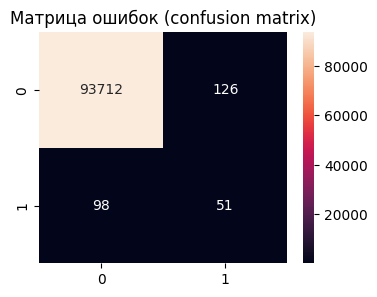

In [ ]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.title('Матрица ошибок (confusion matrix)')
plt.show()

In [ ]:
data = {'anomaly': y_pred}

In [ ]:
df1 = pd.DataFrame(data=X_test)
df1.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
43428,41505.0,-16.526507,8.584972,-18.649853,9.505594,-13.793819,-2.832404,-16.701694,7.517344,-8.507059,...,-1.514923,1.190739,-1.127670,-2.358579,0.673461,-1.413700,-0.462762,-2.018575,-1.042804,1.102834
49906,44261.0,0.339812,-2.743745,-0.134070,-1.385729,-1.451413,1.015887,-0.524379,0.224060,0.899746,...,0.506044,-0.213436,-0.942525,-0.526819,-1.156992,0.311211,-0.746647,0.040996,0.102038,1.726255
29474,35484.0,1.399590,-0.590701,0.168619,-1.029950,-0.539806,0.040444,-0.712567,0.002299,-0.971747,...,0.212877,0.102398,0.168269,-0.166639,-0.810250,0.505083,-0.232340,0.011409,0.004634,-0.229289
276481,167123.0,-0.432071,1.647895,-1.669361,-0.349504,0.785785,-0.630647,0.276990,0.586025,-0.484715,...,-0.244633,0.358932,0.873663,-0.178642,-0.017171,-0.207392,-0.157756,-0.237386,0.001934,-0.347232
278846,168473.0,2.014160,-0.137394,-1.015839,0.327269,-0.182179,-0.956571,0.043241,-0.160746,0.363241,...,-0.255293,-0.238644,-0.616400,0.347045,0.061561,-0.360196,0.174730,-0.078043,-0.070571,-0.349671


In [ ]:
df1['anomaly'] = y_pred # добавим в наш тестовый фрейм аномалии, найденные моделью
df1.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,anomaly
43428,41505.0,-16.526507,8.584972,-18.649853,9.505594,-13.793819,-2.832404,-16.701694,7.517344,-8.507059,...,1.190739,-1.127670,-2.358579,0.673461,-1.413700,-0.462762,-2.018575,-1.042804,1.102834,1
49906,44261.0,0.339812,-2.743745,-0.134070,-1.385729,-1.451413,1.015887,-0.524379,0.224060,0.899746,...,-0.213436,-0.942525,-0.526819,-1.156992,0.311211,-0.746647,0.040996,0.102038,1.726255,0
29474,35484.0,1.399590,-0.590701,0.168619,-1.029950,-0.539806,0.040444,-0.712567,0.002299,-0.971747,...,0.102398,0.168269,-0.166639,-0.810250,0.505083,-0.232340,0.011409,0.004634,-0.229289,0
276481,167123.0,-0.432071,1.647895,-1.669361,-0.349504,0.785785,-0.630647,0.276990,0.586025,-0.484715,...,0.358932,0.873663,-0.178642,-0.017171,-0.207392,-0.157756,-0.237386,0.001934,-0.347232,0
278846,168473.0,2.014160,-0.137394,-1.015839,0.327269,-0.182179,-0.956571,0.043241,-0.160746,0.363241,...,-0.238644,-0.616400,0.347045,0.061561,-0.360196,0.174730,-0.078043,-0.070571,-0.349671,0


In [ ]:
# определяем нормальные и аномальные точки
normal = df1[df1['anomaly'] == 0]
anomaly = df1[df1['anomaly'] == 1]

In [ ]:
y_test.value_counts()

,count
Class,
0,93838
1,149


In [ ]:
# Изучим баланс аномалий, обнаруженных нашей моделью
df1['anomaly'].value_counts()

,count
anomaly,
0,93810
1,177


Чтобы визуализировать найденные аномалии нам нужно снизить потерю информации, для этого мы воспользуемся методом PCA(Principal Component Analysis). Это нужно для того, чтобы не упустить найденные аномалии в данных из виду

PCA: Это линейный метод снижения размерности, который проецирует данные на новое пространство меньшей размерности, сохраняя как можно больше дисперсии (вариации данных).

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [ ]:
# Обучаем PCA и уменьшаем количество признаков до 2 для визуализации
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df1.drop(['anomaly'], axis=1))

In [ ]:
# Добавляем результаты PCA в DataFrame
df1['PCA1'] = pca_result[:, 0] #для 1-го признака
df1['PCA2'] = pca_result[:, 1] #для 2-го признака

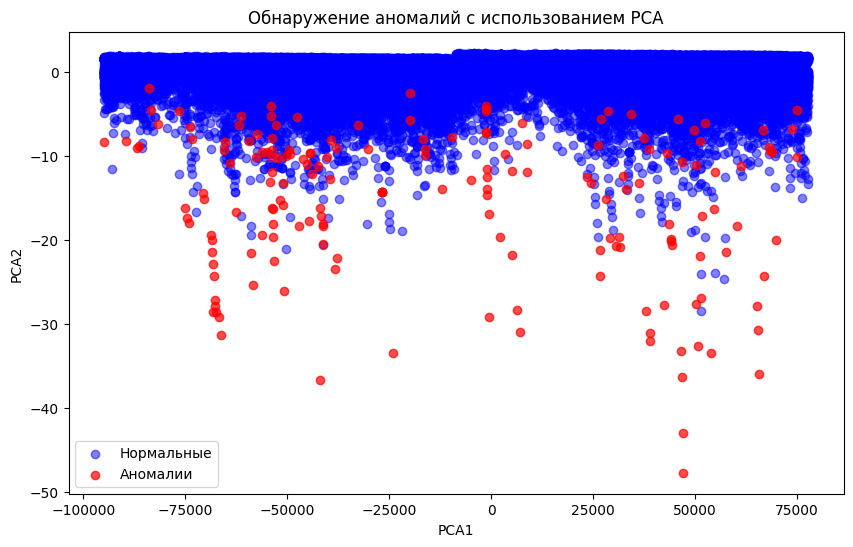

In [ ]:
# Визуализация с выделением аномалий
plt.figure(figsize=(10,6))

# Нормальные транзакции
plt.scatter(df1[df1['anomaly'] == 0]['PCA1'],
            df1[df1['anomaly'] == 0]['PCA2'], c='blue', label='Нормальные', alpha=0.5)

# Аномальные транзакции
plt.scatter(df1[df1['anomaly'] == 1]['PCA1'],
            df1[df1['anomaly'] == 1]['PCA2'], c='red', label='Аномалии', alpha=0.7)

plt.title('Обнаружение аномалий с использованием PCA')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import classification_report, confusion_matrix

df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


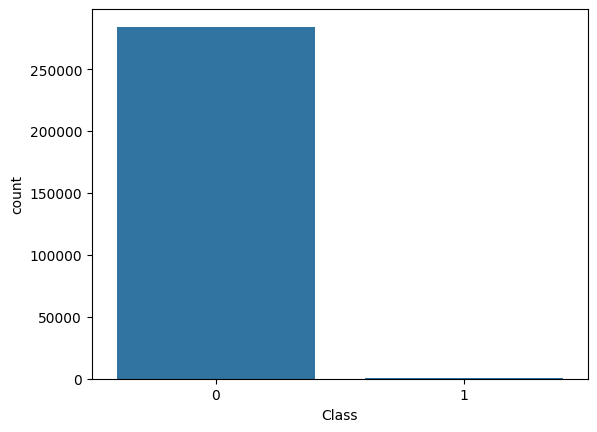

In [ ]:
# Изучим баланс классов
sns.countplot(x='Class', data=df);

In [ ]:
X = df.drop('Class', axis=1)
y = df['Class']

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled,
                                                    y,
                                                    test_size=0.33,
                                                    random_state=42)

In [ ]:
round(df[df['Class'] == 1].shape[0] / df[df['Class'] == 0].shape[0], 4)

0.0017

In [ ]:
model = LocalOutlierFactor(n_neighbors=20, contamination=0.0017, novelty=True)
model.fit(X_train)

LocalOutlierFactor(contamination=0.0017, novelty=True)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_pred = [1 if i == -1 else 0 for i in y_pred]
conf_matrix = confusion_matrix(y_test, y_pred)

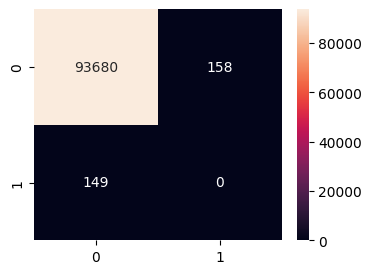

In [ ]:
plt.figure(figsize=(4,3))
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.show()

AutoEncoder

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import callbacks
from tensorflow.keras.optimizers import Adam

In [ ]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
X = df.drop('Class', axis=1)
y = df['Class']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y,
                                                    test_size=0.33,
                                                    random_state=42,
                                                    stratify=y)
# оставляем только нормальные транзакции
X_train_norm = X_train[y_train == 0]

In [ ]:
# Построение автоэнкодера через Sequential API
input_dim = X_train_norm.shape[1]
autoencoder = Sequential([
    Dense(16, activation='relu', input_shape=(input_dim,)),
    Dense(8, activation='relu'),  #Bottleneck
    Dense(16, activation='relu'),
    Dense(input_dim, activation='linear')
])
optimizer = Adam(learning_rate=0.001)
autoencoder.compile(optimizer=optimizer, loss='mse')

In [ ]:
#Обучение модели
early_stop = callbacks.EarlyStopping(monitor='val_loss',    # за какой метрикой следим
                           patience=5,                      # сколько эпох ждать без улучшения
                           restore_best_weights=True)       # вернуть веса от ЛУЧШЕЙ модели

# model_checkpoint = callbacks.ModelCheckpoint(filepath='model_epoch{epoch}.h5',
#                                              monitor='val_loss',        # за какой метрикой следим
#                                              save_best_only=True,       # сохраняем ЛУЧШУЮ модель
#                                              save_weights_only=False,   # True - сохр. только веса, False - сохр. всю модель целиком
#                                              verbose=1,                 # отображать сообщения о сохранении
#                                              mode='min')                # режим сохранения - автоматический

# reduce_lr = callbacks.ReduceLROnPlateau(monitor='val_loss',
#                                         factor=0.75,
#                                         patience=6,
#                                         verbose=1,
#                                         mode='auto',
#                                         min_delta=0.0001,
#                                         cooldown=2,
#                                         min_lr=1e-10)

history = autoencoder.fit(
    X_train_norm, X_train_norm,
    epochs=100,
    batch_size=256,
    shuffle=True,
    validation_split=0.1,
    callbacks=[early_stop],
    verbose=1
  )

Epoch 1/100
670/670 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.8729 - val_loss: 0.6171
Epoch 2/100
670/670 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.6071 - val_loss: 0.5307
Epoch 3/100
670/670 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.5349 - val_loss: 0.4902
Epoch 4/100
670/670 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.4948 - val_loss: 0.4706
Epoch 5/100
670/670 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.4791 - val_loss: 0.4587
Epoch 6/100
670/670 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.4719 - val_loss: 0.4514
Epoch 7/100
670/670 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.4579 - val_loss: 0.4607
Epoch 8/100
670/670 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.4539 - val_loss: 0.4414
Epoch 9/100
670/670 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.4453 - val_loss: 0.4380
Epoch 10/100
670/670 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.4435 - val_loss: 0.4359
Epoch 11/100
670/670 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.4413 - val_loss: 0.4336
Epoch 12/100
670/670 ━━━━━━━━━━━━━━━━━━━━

In [ ]:
pred = autoencoder.predict(X_test)
mse = np.mean(np.power(X_test - pred, 2), axis=1)
mse

2938/2938 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step


In [ ]:
# Выбор порога: например, 99.5 перцентиль
threshold = np.percentile(mse, 99.5)
print(f"Порог ошибки восстановления: {threshold}")

Порог ошибки восстановления: 4.276238366471099


In [ ]:
# Предсказания
y_pred = (mse > threshold).astype(int)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
error_matrix = confusion_matrix(y_test, y_pred)
error_matrix

array([[93456,   369],
       [   61,   101]])

In [ ]:
error_matrix = confusion_matrix(y_test, y_pred)
error_matrix

array([[93481,   344],
       [   36,   126]])

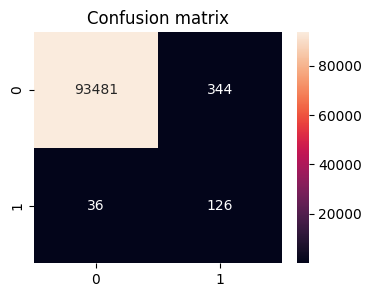

In [ ]:
plt.figure(figsize=(4,3))
plt.title('Confusion matrix')
sns.heatmap(error_matrix, annot=True, fmt='d')
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     93825
           1       0.27      0.78      0.40       162

    accuracy                           1.00     93987
   macro avg       0.63      0.89      0.70     93987
weighted avg       1.00      1.00      1.00     93987



In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     93825
           1       0.20      0.57      0.29       162

    accuracy                           1.00     93987
   macro avg       0.60      0.79      0.65     93987
weighted avg       1.00      1.00      1.00     93987



In [ ]:
test_df = pd.DataFrame(data=X_test, columns=df.columns[:30])
test_df['Anomaly'] = y_pred
test_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Anomaly
0,1.110156,0.887447,-0.718304,-0.769122,-0.305251,0.852212,3.213464,-1.320799,1.005664,1.245511,...,0.378442,0.896863,0.299213,1.224710,-0.966469,0.706728,0.067113,-0.057488,0.081562,0
1,-0.453922,-0.999592,1.330375,0.016248,-0.109885,-0.631836,-0.611057,-0.344960,1.037974,-0.364695,...,-0.244406,-1.060809,0.193843,-0.244545,0.068122,0.221323,-0.085569,0.134592,-0.345313,0
2,0.734714,-0.801097,1.741083,-2.620088,-0.367521,0.816566,-0.659856,0.081771,1.134568,-1.138190,...,0.359373,0.424673,-0.156740,-0.596134,-0.194302,1.109087,-1.817857,-0.162332,-0.350191,0
3,-0.442024,-0.285327,0.102074,0.703992,-1.283464,0.187017,-0.908429,0.446835,-0.149432,-1.816016,...,0.481773,1.079655,-0.486473,0.599531,0.672094,-0.553363,0.085129,0.267531,-0.305252,0
4,0.456412,1.023903,-0.155560,-0.592343,0.020347,-0.158030,-0.480135,-0.165432,-0.010947,0.425687,...,-0.587128,-1.864146,0.823599,-0.787176,-1.464807,0.061341,-0.191416,-0.191619,-0.308691,0


In [ ]:
y_test.value_counts()

,count
Class,
0,93825
1,162


In [ ]:
test_df['Anomaly'].value_counts()

,count
Anomaly,
0,93517
1,470


In [ ]:
history.history

{'loss': [0.40351253747940063,
  0.40367814898490906,
  0.40222641825675964,
  0.40198883414268494,
  0.4028652608394623,
  0.40227094292640686],
 'val_loss': [0.3929562270641327,
  0.39570221304893494,
  0.394332617521286,
  0.39357417821884155,
  0.39366641640663147,
  0.393642783164978]}

## Попробуем объединить AutoEncoder и Isolation Forest

In [ ]:
X_pred = autoencoder.predict(X_scaled) #декодированные данные моделью autoencoder
X_pred

8901/8901 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step


array([[-1.7491968 , -0.6523253 ,  0.27210405, ...,  0.5977591 ,
        -0.04628098, -0.04840732],
       [-1.4057218 ,  0.4471868 ,  0.12083265, ...,  0.009408  ,
        -0.033818  , -0.32486418],
       [-1.7731575 , -0.8107363 , -1.1118605 , ...,  0.04467082,
         0.29811352,  1.0594487 ],
       ...,
       [ 1.2582725 ,  1.0476925 , -0.35575753, ...,  0.07455254,
        -0.07028897, -0.16874075],
       [ 0.734926  , -0.06983791,  0.42028704, ...,  0.16612744,
        -0.03713313, -0.30270198],
       [ 1.3014885 , -0.3021404 ,  0.12258038, ...,  0.10309231,
         0.07225306,  0.5369033 ]], dtype=float32)

In [ ]:
#reshape(-1,1) - преобразует 1D массив в 2D
mse = np.mean(np.square(X_scaled - X_pred), axis=1).reshape(-1,1)

In [ ]:
mse # 1D

array([0.2050819 , 0.10932507, 0.36415458, ..., 0.15866287, 0.98903346,
       0.17178212])

In [ ]:
mse # 2D

array([[0.2050819 ],
       [0.10932507],
       [0.36415458],
       ...,
       [0.15866287],
       [0.98903346],
       [0.17178212]])

In [ ]:
X_scaled.shape, mse.shape

((284807, 30), (284807, 1))

In [ ]:
#np.hstack добавляет столбец с mse к X_scaled
X_extended = np.hstack((X_scaled, mse))
X_extended.shape

(284807, 31)

Таким образом

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
#Получаем ошибку восстановления
X_pred = autoencoder.predict(X_test)
mse = np.mean(np.square(X_test - X_pred), axis=1).reshape(-1, 1)

#Добавляем ее в признак
X_extended = np.hstack((X_test, mse))

#Isolation Forest
from sklearn.ensemble import IsolationForest
model = IsolationForest(n_estimators=200, contamination=0.001, random_state=42)
y_pred = model.fit_predict(X_extended)
y_pred = (y_pred == -1).astype(int)

2938/2938 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


In [ ]:
#Чекаем, что наши предикты это 0 и 1
y_test_pred = pd.Series(y_pred)
y_test_pred.unique()

array([0, 1])

без стандартизации

In [ ]:
error_matrix = confusion_matrix(y_test, y_pred)
error_matrix

array([[93767,    58],
       [  126,    36]])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     93825
           1       0.38      0.22      0.28       162

    accuracy                           1.00     93987
   macro avg       0.69      0.61      0.64     93987
weighted avg       1.00      1.00      1.00     93987

